## Machine learning Project

This project walks through all the major steps involved in completing an End-to-End Machine Learning project. For this project, a supervised learning regression problem is chosen

### 1- Loading Data

The first step of any machine learning problem solving is to collect data. The data in this project concerns city-cycle fuel consumption 

In [3]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2021-09-28 13:56:52--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu... 128.195.10.252
Connecting to archive.ics.uci.edu|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: 'auto-mpg.data.1'

auto-mpg.data.1     100%[===================>]  29.58K   125KB/s    in 0.2s    

2021-09-28 13:56:53 (125 KB/s) - 'auto-mpg.data.1' saved [30286/30286]



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

#modfying metrics and renaming column
df['MPG']=df['MPG']*0.42
df.rename(columns={'MPG':'Km/L'}, inplace=True)

#making a copy of the dataframe
data = df.copy()

In [6]:
data.head()

,Km/L,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,7.56,8,307.0,130.0,3504.0,12.0,70,1
1,6.30,8,350.0,165.0,3693.0,11.5,70,1
2,7.56,8,318.0,150.0,3436.0,11.0,70,1
3,6.72,8,304.0,150.0,3433.0,12.0,70,1
4,7.14,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
data.tail()

,Km/L,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,11.34,4,140.0,86.0,2790.0,15.6,82,1
394,18.48,4,97.0,52.0,2130.0,24.6,82,2
395,13.44,4,135.0,84.0,2295.0,11.6,82,1
396,11.76,4,120.0,79.0,2625.0,18.6,82,1
397,13.02,4,119.0,82.0,2720.0,19.4,82,1


### 2- Defining the problem

The data contains the Km/L variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle.
Our aim here is to predict the Km/L value for a vehicle given we have other attributes of that vehicle.

### 3- EDA with Pandas and Numpy

EDA helps in understanding the data at hand by checking the data format/type, understanding how different variables are distrubuted through the dataset and looking for missing values for instance

In [8]:
data.dtypes

Km/L            float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
Km/L            398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [10]:
data.isnull().sum()

Km/L            0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

The horsepower column has 6 missing values. We’ll have to study the column a bit more

In [11]:
data.describe()

,Km/L,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,9.876121,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,3.282713,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,3.780000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,7.350000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,9.660000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,12.180000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,19.572000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


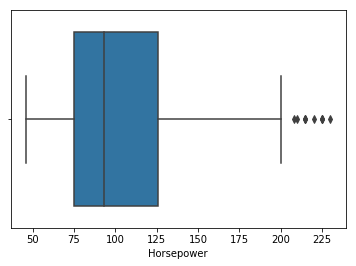

In [12]:
##looking at horsepower box plot
sns.boxplot(x=data['Horsepower'])

Since there are a few outliers, we can use the median of the column to impute the missing values using the pandas median() method.

In [13]:
#imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
Km/L            398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


The 2 categorical columns are Cylinders and Origin which only have a few categories of values. Looking at the distribution of the values among these categories will tell us how the data is distributed

In [14]:
df['Cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [15]:
df['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

Now, we will try to check for some correlations in order to build out intuition about the significant variables 

We will first use a scatterplot for examining a single varbiale then pairplot to walk through all different variables

In [16]:
x=df['Horsepower']
y=df['Km/L']

pl.scatter(x,y)

NameError: name 'pl' is not defined

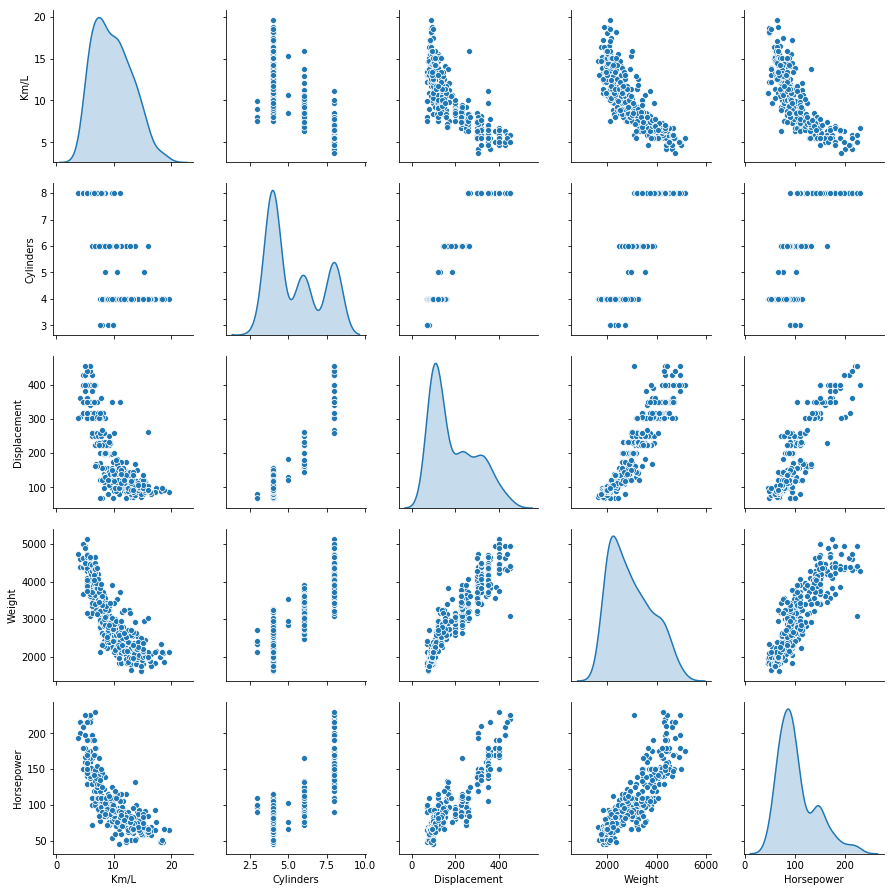

In [17]:
sns.pairplot(data[["Km/L", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

The pair plot gives you a brief overview of how each variable behaves with respect to every other variable.
For example, the km/l column(our target variable) is negatively correlated with Displacement, weight, and horsepower features.

### 3.1- Test Data

Instead of using simple and common **train_test_split()** method from sklearn, we use **stratified sampling**.
We create homogeneous subgroups called strata from the overall population and sample the right number of instances to each stratum to ensure that the test set is representative of the overall population

we saw how the data is distributed over each category of the Cylinder column. We’re using the Cylinder column to create the strata

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [27]:
#checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts()/len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [28]:
#checking for cylinder category distribution in test set
strat_test_set['Cylinders'].value_counts()/len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

#### back to EDA :)

In [21]:
#converting integer classes to countries in Origin column
strat_train_set['Origin'] = strat_train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
strat_train_set.sample(10)

,Km/L,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
359,11.802,4,141.0,80.0,3230.0,20.4,81,USA
297,10.668,5,183.0,77.0,3530.0,20.1,79,USA
280,9.030,6,231.0,115.0,3245.0,15.4,79,India
80,9.240,4,122.0,86.0,2395.0,16.0,72,India
153,7.560,6,250.0,105.0,3459.0,16.0,75,India
342,12.600,4,135.0,84.0,2385.0,12.9,81,India
119,8.400,4,114.0,91.0,2582.0,14.0,73,USA
377,13.020,4,91.0,68.0,1970.0,17.6,82,Germany
244,18.102,4,90.0,48.0,1985.0,21.5,78,USA
230,6.510,8,350.0,170.0,4165.0,11.4,77,India


In [22]:
#one hot encoding
strat_train_set = pd.get_dummies(strat_train_set, prefix='', prefix_sep='')
strat_train_set.head()

,Km/L,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,13.44,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,13.02,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,10.92,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,7.56,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,10.92,4,98.0,90.0,2265.0,15.5,73,0,0,1


#### Testing for new variables — Analyze the correlation of each variable with the target variable

Here we try to test new variables to see if they better explain the target variable 

In [84]:
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

In [85]:
corr_matrix = data.corr()
corr_matrix['Km/L'].sort_values(ascending=False)

Km/L                     1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: Km/L, dtype: float64

We found acceleration_on_power and acceleration_on_cyl as 2 new variables which turned out to be more positively correlated than the original variables.
This brings us to the end of the Exploratory Analysis. We are ready to proceed to our next step of preparing the data for our Machine Learning.

### 4- Data Preparation using Sklearn


One of the important aspects of Data Preparation is that we have to keep automating our steps in the form of functions and classes so that it is easier for us to integrate the methods and pipelines into the main product

#### 1. Preprocessing Categorical Attribute — Converting the Oval


In [29]:
#onehotencoding the categorical values with OneHotEncoder rather than dummies
from sklearn.preprocessing import OneHotEncoder

data_X=strat_train_set.drop('Km/L',axis=1)

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_X[["Origin"]])
data_cat_1hot   # returns a sparse matrix
data_cat_1hot.toarray()[:5]

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

#### 2. Handling missing values with simple imputer

In [30]:
# capturing all rows in columns without the last column
num_data=data_X.iloc[:,:-1]

In [31]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
Cylinders       318 non-null int64
Displacement    318 non-null float64
Horsepower      314 non-null float64
Weight          318 non-null float64
Acceleration    318 non-null float64
Model Year      318 non-null int64
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [32]:
#handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(num_data)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [33]:
#returns an array
X=imputer.transform(num_data)

In [34]:
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [35]:
#saving it back to a dataframe
data_tr=pd.DataFrame(X, columns=num_data.columns , index=num_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
Cylinders       318 non-null float64
Displacement    318 non-null float64
Horsepower      318 non-null float64
Weight          318 non-null float64
Acceleration    318 non-null float64
Model Year      318 non-null float64
dtypes: float64(6)
memory usage: 17.4 KB


#### 3. Adding Attributes

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

#custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array, concatenates 2 arrays
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

### Using pipelines

Sklearn offers a great number of classes and methods to develop such automated pipelines of data transformations.


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer 

def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder(acc_on_power=True)),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

We have numerical transformation ready, the only categorical column we have is Origin for which we need to one-hot encode the values.
Here’s how we can use the ColumnTransformer class to capture both of these tasks in one go

In [38]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [49]:
#using the pipeline
prepared_data = pipeline_transformer(data_X)
prepared_data[:4]

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
        -0.54436373,  1.81674749,  1.70952741,  1.29565517,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , -1.17581316,  0.13069829,
        -0.54436373,  0.54980516,  0.79867454,  0.666186  ,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.3587492 , -0.31547399, -0.47182837, -0.41188729,
         1.63652025, -0.71713717, -0.21906787,  0.35145142,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746,  0.56746699, -0.42340377,  0.19485124, -0.41188729,
        -1.36219522, -0.71713717, -0.12927251, -0.66269335,  1.        ,
         0.        ,  0.        ]])

### Selecting and Training Machine Learning Models
Since this is a regression problem, we chose to train the following models:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor and,
- SVM Regressor

#### 1.Linear Regression

In [50]:
data_labels = strat_train_set["Km/L"].copy()


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
#testing the predictions with: 
sample_data = data_X.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

Prediction of samples:  [12.16035967 11.59806465 10.86536323  5.24739326  9.26755775]


/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [52]:
print("Actual Labels of samples: ", list(sample_labels))

Actual Labels of samples:  [13.44, 13.02, 10.92, 7.56, 10.92]


#### Evaluation:MSE

In [53]:
from sklearn.metrics import mean_squared_error

kml_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, kml_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2427968934819564

#### Decision Tree:

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
The Mean Square Error returned by sklearn.cross_validation.cross_val_score is always a negative.

In [55]:
kml_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, kml_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.9290002606945107e-16

## Model Evaluation using Cross Validation

Scikit-Learn’s K-fold cross-validation feature randomly splits the training set into K distinct subsets called folds, then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other K-1 folds.

The result is an array containing the K evaluation scores:

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", #The Mean Square Error returned by sklearn.cross_validation.cross_val_score 
                                                           #is always a negative.
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [57]:
tree_reg_rmse_scores 

array([1.31189086, 1.29986014, 1.43600696, 1.40748965, 0.91353017,
       1.3327557 , 1.27281916, 1.75598178, 1.75724513, 1.06584051])

In [58]:
tree_reg_rmse_scores.mean()

1.3553420068140067

In [59]:
# for the regression model
scores = cross_val_score(lin_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([1.44166931, 1.44966204, 1.53811203, 1.0905425 , 1.0416983 ,
       1.15415208, 1.39660352, 1.01727745, 1.58815976, 1.20009737])

In [60]:
lin_reg_rmse_scores.mean()

1.2917974353357917

#### Random Forest model

In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.1006003000902589

#### Support Vector Machine Regressor

In [62]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

1.3030853016477295

Now, as we can see, the Random forest model seems to be pretty accurate since its mse is 1.1. But, we won't stop here, we need to tune 
play with some hyperparameters in order to se if we can further improve the accuracy

### Hyperparameter Tuning using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [64]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [65]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

1.5431847287082123 {'max_features': 2, 'n_estimators': 3}
1.3214250373872753 {'max_features': 2, 'n_estimators': 10}
1.194908574171652 {'max_features': 2, 'n_estimators': 30}
1.4159309935926792 {'max_features': 4, 'n_estimators': 3}
1.192331435339232 {'max_features': 4, 'n_estimators': 10}
1.1746183812776045 {'max_features': 4, 'n_estimators': 30}
1.3438759442222037 {'max_features': 6, 'n_estimators': 3}
1.1606948387406766 {'max_features': 6, 'n_estimators': 10}
1.1284495354078816 {'max_features': 6, 'n_estimators': 30}
1.3530314996309991 {'max_features': 8, 'n_estimators': 3}
1.1862945171876307 {'max_features': 8, 'n_estimators': 10}
1.1461524794561682 {'max_features': 8, 'n_estimators': 30}
1.377950036063279 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.2183618159736629 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1.3348787710250443 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.200203016789007 {'bootstrap': False, 'max_features': 3, 'n_est

In [66]:
# feature importances 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.19949948, 0.2906683 , 0.10793304, 0.2059098 , 0.02015723,
       0.11441282, 0.00282785, 0.03806451, 0.01597304, 0.0014302 ,
       0.00166603, 0.0014577 ])

In [68]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data_X.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.038064511307692374),
 ('acc_on_cyl', 0.015973037020558793),
 ('Weight', 0.2059097975027332),
 ('Origin', 0.002827845290712264),
 ('Model Year', 0.11441282472044043),
 ('Horsepower', 0.10793303729590284),
 ('Displacement', 0.2906682983593804),
 ('Cylinders', 0.19949948034969084),
 ('Acceleration', 0.020157233890395285)]

### Evaluating the entire system on Test Data

In [95]:
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Km/L", axis=1)
y_test = strat_test_set["Km/L"].copy()

X_test_prepared = pipeline_transformer(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [96]:
final_rmse

1.2380689368932571

In [97]:
import warnings
warnings.filterwarnings('ignore')

### Creating a function that covers the entire workflow

In [98]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    prepared_df = pipeline_transformer(df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [99]:
##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([14.3206,  7.6734,  8.7808])

### Saving the model

In [101]:
import pickle

In [102]:
#saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [103]:
#loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([14.3206,  7.6734,  8.7808])